Pedro Henrique Martins de Souza \\
Email: pedromartins12117@gmail.com

Enxame de partículas é um método de otimização pertencente a categoria das meta-heurísticas, sendo um algoritmo bioinspirado que se baseia na maneira em que grupos de passaros se comportam. Como todo método de otimização, seu objetivo é, por meio de uma busca, encontrar a solução ótima de algum problema. Para isso, o algoritmo se aproveita de uma população para obter informações que são compartilhadas entre os indivíduos a fim de definir suas trajetórias.

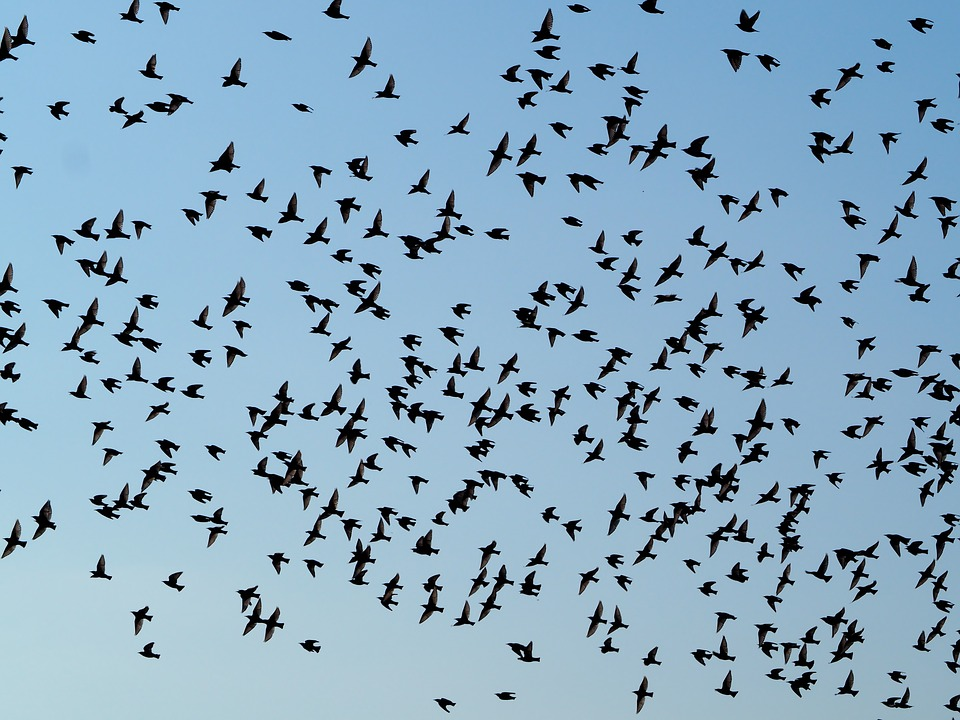

No método, uma função de aptidão (fitness) define o espaço de busca, no qual contem os indivíduos ou partículas, semelhante a um grupo de passaros. A busca se da pela movimentação das partículas dentro do espaço de busca até que as condições de parada sejam alcançadas, dando a posição do melhor indivíduo da busca como sendo a solução ótima. Essa movimentação é expressa pelas seguintes equações:

$$v_{k+1} = wv_k + c_1r_1(p_{best_k} - x_k) + c_2r_2(g_{best} - x_k)$$
$$x_{k+1} = x_k + v_k$$

onde:
- $v$ é a velocidade
- $x$ é a posição
- $w$ é o coeficiente de inércia
- $p_{best_k}$ é a melhor posição da partícula
- $g_{best}$ é a melhor posição da busca
- $c_1$ e $c_2$ são os coeficientes cognitivo e social respectivamente
- $r_1$ e $r_2$ são números aleatórios
- $k$ é referente a iteração

Sendo assim, o algoritmo terá os seguintes passos:

1. Inicializar uma população de indivíduos
2. Determinar os coeficientes ($w$, $c_1$ e $c_2$)
3. Iniciar um loop entre as epocas, se o número máximo de períodos for atingido quebrar o loop
  4. Iniciar um loop entre os indivíduos, se todos os indivíduos tiverem sido examinados quebrar o loop
    5. Sortear os números aleatórios $r_1$ e $r_2$
    6. Determinar a melhor posição do indivíduo
    7. Determinar o indivíduo com a melhor posição da busca
    8. Atualizar a velocidade
    9. Atualizar a posição

Diferente de alguns métodos da otimização classica, a otimização por enxame de partículas não utiliza o gradiente da função objetivo para decidir a melhor direção e sim as melhores posições entre os indivíduos ($p_{best_k}$ e $g_{best}$). Com essa característica, o método se apresenta como uma opção para os casos em que realizar a diferenciação da função objetivo seja trabalhoso ou impossível.

O coeficiente de inércia, $w$, regula o quanto da sua velocidade anterior a partícula deve manter. Já os coeficientes cognitivo e social, $c_1$ e $c_2$ respectivamente, controlam a importancia que cada partícula da a sua propria posição (coeficiente cognitivo) e a posição das demais partículas (coeficiente social), dando a característica de simular um grupo de passaros em que o método se baseia e representando a relação entre *exploration* e *exploitation*. Grande parte das pesquisas envolvendo a otimização por enxame de partículas envolveu determinar quais as melhores formas de definir esses coeficientes.

O pacote *pyswarms* do python implementa um conjunto de funções e classes para se trabalhar com a otimização por enxame de partículas ([documentação](https://pyswarms.readthedocs.io/en/latest/index.html)). 

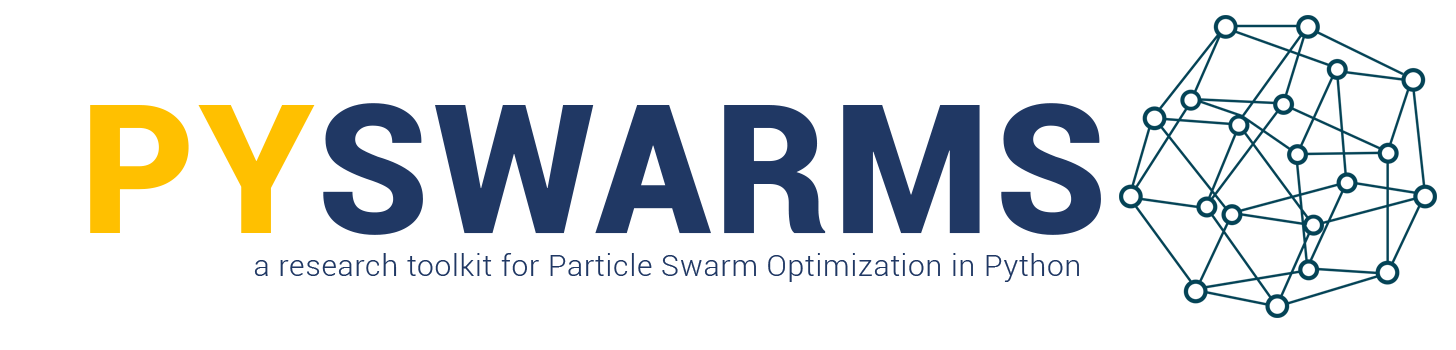

Para instalá-lo executamos o comando na seguinte célula

In [1]:
!pip install pyswarms # instala o pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No início do código realizamos as seguintes importações

In [2]:
import numpy as np # importa o numpy
import pyswarms as ps # importa o pyswarms
import matplotlib.pyplot as plt # importa o matplotlib
from matplotlib import cm # importa o colormap

Como exemplo da utilização do pacote *pyswarms*, a função Rastrigin será utilizada como sendo a função objetivo ou função de aptidão, expressa por:
$$f(\mathbf{x})=An+\sum_{i=0}^{n}[x_{i}^{2} - A \cos(2\pi x_{i})]$$
onde $A=10$, $n$ é o número de variáveis e $x_i \in \left[-5.12,5.12\right]$. A função da célula abaixo a define.

In [3]:
# define a função Rastrigin
def rastrigin(x, n):
  f = 0
  for i in range(n):
    f += 10 + x[:, i] ** 2 - 10 * np.cos(2 * np.pi * x[:, i])
  return f

Para que a função seja visualizada, a célula abaixo constroi um gráfico 3D da função Rastrigin.

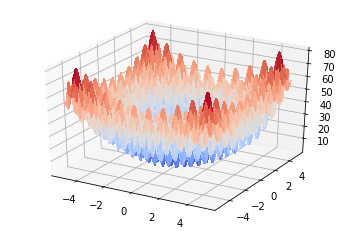

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}); # cria a figura 3D

# define os pontos
X = np.linspace(-5.12, 5.12, 5000)
Y = np.linspace(-5.12, 5.12, 5000)

X, Y = np.meshgrid(X, Y) # cria a malha
XY = np.array([[X[:, i], Y[:, i]] for i in range(5000)]) # rearranja a malha
Z = rastrigin(XY, 2) # calcula os valores de f(x) da função Rastrigin

# plota a superfície
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

Agora na utilização do pacote, primeiramente instanciamos um objeto da classe `GlobalBestPSO` que recebe no construtor a quantidade de partículas em `n_particles`, a quantidade de variáveis em `dimensions`, os coeficientes de inércia, cognição e social em `options` e os limites inferiores e superiores em `bounds`. Os passos de definição desses parâmetros são exemplificados na célula abaixo

In [5]:
# define os limites
x_max = 5.12 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)

options = {'c1': 2.05, 'c2': 2.05, 'w': 0.5} # define os coeficientes

# instancia um objeto da classe do otimizador
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

Em seguida, para rodar a busca, chamamos o método `optimize` como na célula abaixo. Ele recebe a função objetivo como primeiro parâmetro, a quantidade de iterações ou períodos em `iters` e o restante dos argumentos que devem ser passados para a função de aptidão como *keyword arguments* (`kwargs`).

In [6]:
cost, pos = optimizer.optimize(rastrigin, iters=100, n=2) # inicia a busca do ótimo

2022-08-02 18:32:30,926 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 2.05, 'c2': 2.05, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.01e-10
2022-08-02 18:32:31,558 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.012861071738371e-10, best pos: [-1.17474413e-06  3.72310170e-07]


O método retornará o custo e a melhor posição, que são apresentados pela célula abaixo

In [7]:
# printa o resultado da busca
print(f'Custo: {cost}')
print(f'Posição: {pos}')

Custo: 3.012861071738371e-10
Posição: [-1.17474413e-06  3.72310170e-07]


Um ponto importante a se falar a respeito da otimização por exame de partículas é a forma em que se é organizado a população e como as informações das posições são transferidas para os indivíduos. Isso é feito por meio da topologia da população, que é responsável por estabelecer quais indivíduos participam em uma troca de informação. Por exemplo, na explicação inicial aqui realizada foi apresentado a topologia global, onde todas as particulas possuem informações sobre as demais. Em outros casos poderiamos ter uma outra forma de organização, como por exemplo a topologia local em que as partículas possuem informações apenas de suas vizinhas a esquerda e direita. A seguinte figura apresenta algumas diferentes topologias possíveis:

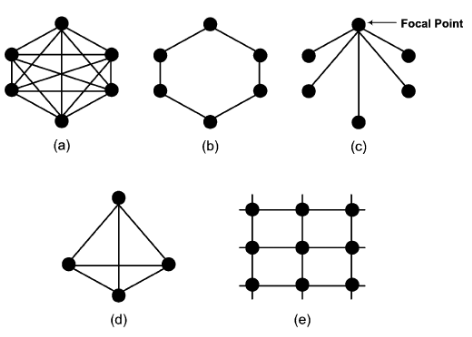

A escolha de uma topologia tem grande influência na eficiência e eficácia do método, variando as chances de uma busca atingir um ótimo global ou convergir prematuramente para um ótimo local. Com isso, determinar qual a melhor topologia é uma tarefa depentende de cada problema.

O pacote *pyswarms* implementa a topologia global na classe `GlobalBestPSO` e a local na classe `LocalBestPSO`, porem a classe `GeneralOptimizerPSO` oferece uma interface para um otimizador mais geral, que pertime a definição da topologia ([documentação](https://pyswarms.readthedocs.io/en/latest/api/pyswarms.single.html#)). A classe `GeneralOptimizerPSO` possui os mesmos parâmetros que a classe `GlobalBestPSO` com a adição do parâmetro `topology` utilizado para definir a topologia ([para todas as topologias possíveis](https://pyswarms.readthedocs.io/en/latest/api/pyswarms.topology.html#)). A topologia global pode ser definida através da classe `Star` como na célula abaixo

In [8]:
from pyswarms.backend.topology import Star # importa a classe da topologia global

# define os limites
x_max_t = 5.12 * np.ones(2)
x_min_t = -1 * x_max_t
bounds_t = (x_min_t, x_max_t)

options_t = {'c1': 2.05, 'c2': 2.05, 'w': 0.5} # define os coeficientes
my_topology = Star() # instancia um objeto da classe da topologia global

# instancia um objeto da classe do otimizador
optimizer_t = ps.single.GeneralOptimizerPSO(n_particles=10, dimensions=2, options=options_t, bounds=bounds_t, topology=my_topology)

De forma idêntica a feita anteriormente, a busca é iniciada por meio da chamada do método `optimize` como na célula abaixo

In [9]:
cost_t, pos_t = optimizer_t.optimize(rastrigin, iters=100, n=2) # inicia a busca do ótimo

2022-08-02 18:32:31,633 - pyswarms.single.general_optimizer - INFO - Optimize for 100 iters with {'c1': 2.05, 'c2': 2.05, 'w': 0.5}
pyswarms.single.general_optimizer: 100%|██████████|100/100, best_cost=0.000504
2022-08-02 18:32:32,336 - pyswarms.single.general_optimizer - INFO - Optimization finished | best cost: 0.0005036849260697807, best pos: [0.00150407 0.00052594]


In [10]:
# printa o resultado da busca
print(f'Custo: {cost_t}')
print(f'Posição: {pos_t}')

Custo: 0.0005036849260697807
Posição: [0.00150407 0.00052594]


Sua vez!

Construa um gráfico 3D e realize a busca do ponto ótimo utilizando o pacote pyswarms com topologia local da seguinte função:

$$f(x, y) = (x - 3.14)^2 + (y - 2.72)^2 + \sin(3x + 1.41) + \sin(4y - 1.73)$$